In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
from networkx.algorithms import bipartite
import numpy as np


In [18]:
df = pd.read_csv("morbidmap.txt",sep='\t')
df.head()
G = nx.Graph()

c = 0
colors = ['#d61111','#11c6d6']
list_of_colors = []
disease_list = []
for index, row in df.iterrows():
    if isinstance(row['Gene Symbols'], str):
        
        G.add_node(row['# Phenotype'], attr_dict={'type':'disease'})
        disease_list.append(row['# Phenotype'])
        list_of_colors.append(colors[0])
        
        list_ = row['Gene Symbols'].split(", ")
        
        for i in list_:
            if not G.has_node(i):
                G.add_node(i,attr_dict={'type':'gene'})
                list_of_colors.append(colors[1])
            G.add_edge(row['# Phenotype'], i)
#     if c >10000:
#         break
#     else:
#         c = c+1

In [19]:
# nx.draw_circular(G,node_color = list_of_colors, with_labels=False, node_size = 5) # draw it pretty
# plt.show()

In [20]:
# nx.draw_spring(G,node_color = list_of_colors, with_labels=False, node_size = 5) # draw it pretty
# plt.show()

In [21]:
# G_diseases = bipartite.projected_graph(G, disease_list, multigraph=True)
# nx.draw_spring(G_diseases, with_labels=False, node_size = 10) # draw it pretty

In [22]:
def plotDegsCCDF(degrees):
    # tabulate and display the CCDF Pr(K>=k)
    kmax    = 0
    kis     = []
    for _,ki in degrees:
        kis.append(ki)
        if ki > kmax: kmax = ki

    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

def calculate_MeanGeodesic(Go):
    n = Go.number_of_nodes()#function for number of nodes
    m = Go.size() #function for number of edges

    dij = dict(nx.all_pairs_shortest_path_length(Go)) # APSP on G, store as a dictionary (tricky :)
    mean_geo_path_per_Node = [] # store average path length from any given nodes
    for i in dij.values(): #iterate through each dict of shortest pathes per node
        node = []
        for x in i.values(): #iterate through shortest pathes for each node
            if x != 0: # if path length doesn't equal zero then append to shortest pathes
                node.append(x)
        if len(node)!=0: #if node has any nodes attached then find the mean shortest path and add to list of all nodes
            mean_geo_path_per_Node.append(np.mean(node))
    ellmean = np.mean(mean_geo_path_per_Node)#add mean of graph to ellms array
    return ellmean

def summarystats(Go):
    n = Go.number_of_nodes()#function for number of nodes
    m = Go.size() #function for number of edges
    kmean = m*2/n #mean of in directed degree is edges/number of nodes
    ellmean = calculate_MeanGeodesic(Go)
    C = nx.transitivity(Go)# C 

    print(f'number of nodes, n  = {n}')
    print(f'number of edges, m  = {m}')
    print(f'mean degree,    <k> = %5.2f' % kmean)
    print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
    print(f'clustering coefficient, C     = %5.2f' % C)

In [23]:
summarystats(G)

number of nodes, n  = 21733
number of edges, m  = 24398
mean degree,    <k> =  2.25
mean geodesic distance, <ell> =  1.67
clustering coefficient, C     =  0.00


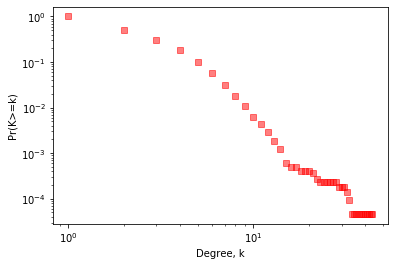

In [25]:
plotDegsCCDF(G.degree())